# Capítulo 6 
### Linear Model Selection and Regularization

#### Lab 1 - Subset Selection Methods

In [1]:
# Usar o banco "Hitters" do pacote ISLR do R e importá-lo com o Pandas
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glmnet as gln

from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_errorror


plt.style.use('fivethirtyeight')

pd.set_option('display.float_format', '{:20,.5f}'.format) # Para tirar a notação

hitters = pd.read_csv("hitters.csv", index_col = 0)

/Users/mateuspestana/Library/Python/3.7/lib/python/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/Users/mateuspestana/Library/Python/3.7/lib/python/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 52.8+ KB


In [3]:
hitters.head(10) # equivale ao head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,nan,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.00000,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.00000,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.00000,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.50000,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.00000,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.00000,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.00000,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.00000,N
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,"1,100.00000",A


In [4]:
hitters.columns # Equivale ao names()

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [5]:
hitters.shape # equivale ao dim(). Não confundir com o .ndim

(322, 20)

In [6]:
hitters.isna().sum() # equivale ao sum(is.na(hitters))

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [8]:
# Para remover os na
hitters = hitters.dropna()
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [8]:
hitters.isna().sum() # OK! 

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [9]:
hitters['League'] = pd.get_dummies(hitters['League']).iloc[:, 1]
hitters['Division'] = pd.get_dummies(hitters['Division']).iloc[:, 1]
hitters['NewLeague'] = pd.get_dummies(hitters['NewLeague']).iloc[:, 1]

hitters = hitters.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18]]
x = hitters.iloc[:, 0:19]
y = hitters.iloc[:, 19]

In [10]:
# Falta ver aqui como fazer aquele regsubset etc

### Ridge Regression

In [11]:
grid = 10  ** np.linspace(3, -2, 100)

ridge_mod = Ridge(normalize = True)
coefs = []

for a in grid:
    ridge_mod.set_params(alpha = a)
    ridge_mod.fit(x, y)
    coefs.append(ridge_mod.coef_)

In [12]:
# coefs.shape[]
print("Dimensões dos coeficientes:", len(coefs), len(coefs[0]))


Dimensões dos coeficientes: 100 19


In [13]:
# Olhando o Lambda no caso 50 (como python indexa em 0, caso 49)
grid[49] # é o lambda

3.351602650938841

In [14]:
pd.Series(coefs[49], index = x.columns) # coeficientes quando o lambda é 11497

AtBat                    0.10768
Hits                     0.48869
HmRun                    1.31796
Runs                     0.75786
RBI                      0.73100
Walks                    1.00938
Years                    2.78921
CAtBat                   0.00930
CHits                    0.03704
CHmRun                   0.27235
CRuns                    0.07422
CRBI                     0.07695
CWalks                   0.06917
League                   6.81267
Division               -33.62792
PutOuts                  0.07705
Assists                  0.01026
Errors                  -0.30280
NewLeague                5.36069
dtype: float64

In [15]:
grid[59]
pd.Series(coefs[59], index  = x.columns)

AtBat                    0.10016
Hits                     0.75475
HmRun                    0.93000
Runs                     1.01050
RBI                      0.87364
Walks                    1.47875
Years                    2.10667
CAtBat                   0.01126
CHits                    0.05206
CHmRun                   0.37213
CRuns                    0.10387
CRBI                     0.10925
CWalks                   0.06542
League                  17.95086
Division               -67.36377
PutOuts                  0.14325
Assists                  0.02163
Errors                  -1.01680
NewLeague                9.43672
dtype: float64

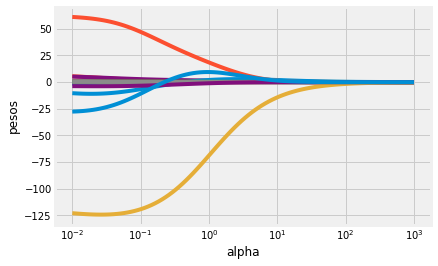

In [16]:
ax = plt.gca()
ax.plot(grid, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('pesos');

In [17]:
#  Fazendo o split entre  treino e teste
x_train, x_test,  y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.5, random_state = 1)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((131, 19), (132, 19), (131,), (132,))

In [19]:
# Lambda 4
ridge_mod2 = Ridge(alpha = 4, normalize  = True)
ridge_mod2_fit = ridge_mod2.fit(x_train, y_train)
y_pred2 = ridge_mod2.predict(x_test)
pd.Series(ridge_mod2_fit.coef_, index = x.columns)

AtBat                    0.09866
Hits                     0.44609
HmRun                    1.41211
Runs                     0.66077
RBI                      0.84340
Walks                    1.00847
Years                    2.77988
CAtBat                   0.00824
CHits                    0.03415
CHmRun                   0.26863
CRuns                    0.07041
CRBI                     0.07006
CWalks                   0.08279
League                   4.24105
Division               -30.76888
PutOuts                  0.10475
Assists                 -0.00374
Errors                   0.26836
NewLeague                4.12347
dtype: float64

In [20]:
# MSE
mean_squared_error(y_test,  y_pred2)

106216.52238005563

In [21]:
# Lambda 1e10
ridge_mod3 = Ridge(alpha=1e10, normalize=True)
ridge_mod3_fit = ridge_mod3.fit(x_train, y_train)
y_pred3 = ridge_mod3.predict(x_test)
pd.Series(ridge_mod3_fit.coef_, index=x.columns)

AtBat                    0.00000
Hits                     0.00000
HmRun                    0.00000
Runs                     0.00000
RBI                      0.00000
Walks                    0.00000
Years                    0.00000
CAtBat                   0.00000
CHits                    0.00000
CHmRun                   0.00000
CRuns                    0.00000
CRBI                     0.00000
CWalks                   0.00000
League                  -0.00000
Division                -0.00000
PutOuts                  0.00000
Assists                 -0.00000
Errors                   0.00000
NewLeague               -0.00000
dtype: float64

In [22]:
mean_squared_error(y_test, y_pred3)

172862.23580379886

In [23]:
# Lambda 0
ridge_mod4 = Ridge(alpha=0, normalize=True)
ridge_mod4_fit = ridge_mod4.fit(x_train, y_train)
y_pred4 = ridge_mod4.predict(x_test)
pd.Series(ridge_mod4_fit.coef_, index=x.columns)

AtBat                   -1.82111
Hits                     4.25916
HmRun                   -4.77340
Runs                    -0.03876
RBI                      3.98458
Walks                    3.47013
Years                    9.49824
CAtBat                  -0.60513
CHits                    2.17498
CHmRun                   2.97931
CRuns                    0.26636
CRBI                    -0.59846
CWalks                   0.17138
League                 133.74316
Division              -113.74387
PutOuts                  0.42106
Assists                  0.46438
Errors                  -6.02458
NewLeague              -81.92776
dtype: float64

In [24]:
mean_squared_error(y_test, y_pred4)

116690.46856660137

In [25]:
# Validação Cruzada (CV) na regressão ridge 
ridge_cv = RidgeCV(alphas = grid, normalize = True, scoring = 'neg_mean_squared_error')
ridge_cv.fit(x_train, y_train)
ridge_cv.alpha_

0.5857020818056667

In [26]:
ridge_mod5 = Ridge(alpha = ridge_cv.alpha_, normalize = True)
ridge_mod5_fit = ridge_mod5.fit(x_train, y_train)
y_pred5 = ridge_mod5.predict(x_test)
pd.Series(ridge_mod5_fit.coef_, index=x.columns)

AtBat                   -0.01054
Hits                     0.85783
HmRun                   -0.25559
Runs                     0.72445
RBI                      1.31289
Walks                    2.08091
Years                    1.24184
CAtBat                   0.00674
CHits                    0.05185
CHmRun                   0.50997
CRuns                    0.10642
CRBI                     0.12755
CWalks                   0.09931
League                  18.74612
Division               -91.61325
PutOuts                  0.27850
Assists                 -0.01733
Errors                  -0.30212
NewLeague                9.99140
dtype: float64

###  Lasso

In [27]:
lasso_mod = Lasso(normalize= True,max_iter  = 100000)

coefs = []
for a in grid:
    lasso_mod.set_params(alpha  = a)
    lasso_mod.fit(scale(x_train), y_train)
    coefs.append(lasso_mod.coef_)
    
pd.Series(lasso_mod.coef_, index=x.columns)

AtBat                 -277.76810
Hits                   218.98444
HmRun                  -33.95717
Runs                    -8.40904
RBI                     94.57912
Walks                   85.21447
Years                   39.10457
CAtBat              -1,281.82046
CHits                1,230.96045
CHmRun                 216.27155
CRuns                  140.85215
CRBI                  -118.69262
CWalks                  21.51505
League                  63.88568
Division               -57.37228
PutOuts                125.78313
Assists                 63.84313
Errors                 -36.12178
NewLeague              -38.77461
dtype: float64

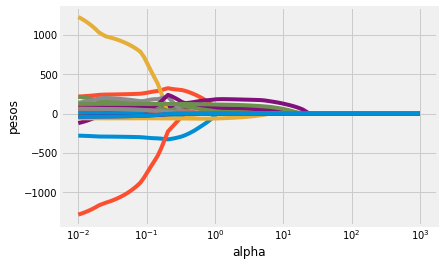

In [28]:
ax = plt.gca()
ax.plot(grid, coefs)
ax.set_xscale('log')

plt.axis('auto')
plt.xlabel('alpha')
plt.ylabel('pesos');

In [29]:
lasso_cv = LassoCV(alphas=grid, max_iter=100000, normalize=True, cv=10)
lasso_cv.fit(x_train, y_train)
lasso_cv.alpha_

2.364489412645407

In [30]:
lasso_mod2 = Lasso(alpha = lasso_cv.alpha_, normalize = True, max_iter= 10000)
lasso_mod2_fit = lasso_mod2.fit(x_train,y_train)
lassoy_pred2 = lasso_mod2_fit.predict(x_test)

pd.Series(lasso_mod2_fit.coef_, index=x.columns)

AtBat                    0.00000
Hits                     1.08587
HmRun                    0.00000
Runs                     0.00000
RBI                      0.00000
Walks                    2.91350
Years                    0.00000
CAtBat                   0.00000
CHits                    0.00000
CHmRun                   0.22134
CRuns                    0.00000
CRBI                     0.51447
CWalks                   0.00000
League                   0.00000
Division               -89.91394
PutOuts                  0.36912
Assists                 -0.00000
Errors                  -0.00000
NewLeague                0.00000
dtype: float64

### PCR e PLS

In [31]:
pca = PCA()
x_pca = pca.fit_transform(scale(x))
pd.DataFrame(x_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.00965,1.87052,1.26515,-0.93548,1.10964,1.21197,-0.06515,-0.09825,-0.25242,-0.63710,0.45934,0.61586,-0.47809,0.38841,0.06360,0.14479,0.08022,0.03814,-0.01925
1,0.41143,-2.42942,-0.90919,-0.26421,1.23203,1.82662,0.35989,-1.19938,-0.37182,0.01521,0.17624,0.08053,0.40348,-0.01939,0.06515,0.16106,0.04434,0.01483,-0.00339
2,3.46682,0.82595,0.55547,-1.61673,-0.85749,-1.02871,-0.99939,0.84425,0.19738,0.77049,0.05565,0.10494,0.02161,-0.37620,0.23429,0.01153,-0.21828,0.03783,-0.06650
3,-2.55832,-0.23098,0.51964,-2.17625,-0.82030,1.49170,-0.27614,0.20709,0.41496,0.13684,-0.08537,-0.14622,0.14217,0.02897,0.04246,0.05304,-0.04444,0.01036,-0.01358
4,1.02770,-1.57354,1.33138,3.49400,0.98343,0.51368,0.14046,0.98971,-0.66193,-0.21756,0.11126,0.19124,-0.30243,-0.09077,0.04381,0.01230,-0.05059,0.12604,-0.07104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,-0.33117,-0.16566,0.77589,-1.53670,-1.03502,-0.30630,0.55237,1.18424,-0.24665,0.37940,-0.09496,-0.03364,0.21677,-0.16180,0.22744,-0.22488,0.12649,-0.05540,-0.00974
259,3.24618,-0.54331,1.20915,2.75402,-1.19752,0.83475,1.96988,-1.37191,-0.54395,-0.89772,-0.16616,-0.29819,0.51057,0.31812,-0.14481,0.00895,-0.15283,-0.05387,-0.06228
260,-1.09461,-0.75139,-0.93594,1.07235,0.70591,-0.64448,1.49615,0.28711,-0.30437,0.01786,0.22139,0.37817,0.01631,0.09228,0.05604,-0.10349,-0.07874,0.06720,0.01319
261,1.97768,-2.18452,-0.28201,-0.21687,-0.69487,3.51469,1.14210,-0.23070,-0.24099,0.32496,0.11860,0.16204,-0.34703,-0.23276,0.02105,-0.26228,-0.01441,0.02292,-0.01053


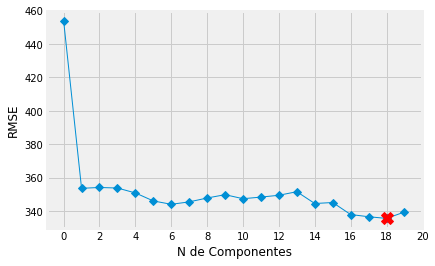

In [32]:
n = len(x_pca)
k10 = KFold(n_splits = 10,  shuffle=True, random_state = 2)

lin_reg = LinearRegression()
rmse = []

score = -1 * cross_val_score(lin_reg,  np.ones((n, 1)), y, cv = k10, scoring = 'neg_mean_squared_error').mean()
rmse.append(np.sqrt(score))

for i in np.arange(1,20):
    score = -1 *cross_val_score(lin_reg, x_pca[:, :i], y, cv = k10, scoring = 'neg_mean_squared_error').mean()
    rmse.append(np.sqrt(score))
    
min_rmse  = np.array(rmse).argmin()

plt.plot(rmse, '-D', markersize = 5, lw = 1)
plt.plot(rmse, markevery=[min_rmse], marker = 'X', lw = 0, color = 'r', markersize = 12)
plt.xlabel('N de Componentes')
plt.ylabel('RMSE')
plt.xticks(np.linspace(0,20,11));

In [33]:
rmse

[453.9151438352577,
 353.72985059230996,
 354.22412193956956,
 353.90201122190746,
 350.95846635685007,
 346.18098732700025,
 344.16559623185475,
 345.61122841718174,
 347.9296720557596,
 349.9208190385274,
 347.50969440861564,
 348.4771633886489,
 349.5689299684256,
 351.6988447259376,
 344.63691910079183,
 345.238400845699,
 338.0474378173951,
 336.74023824097947,
 335.727080653414,
 339.56437752741994]

In [34]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 38.31423957,  60.15531541,  70.8416746 ,  79.03419435,
        84.29027516,  88.63477938,  92.26288766,  94.96304322,
        96.28269124,  97.25541298,  97.97775424,  98.64870031,
        99.15178693,  99.4730334 ,  99.74659124,  99.89398793,
        99.96815949,  99.99375108, 100.        ])

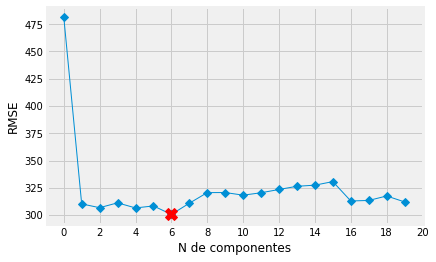

In [35]:
x_train, _test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.5, random_state=2)

pca2 = PCA()
x_train_pca2 = pca2.fit_transform(scale(x_train))

n = len(x_train_pca2)
k102 = KFold(n_splits= 10, shuffle=True, random_state=1)

lin_reg2 = LinearRegression()
rmse2 = []

score = -1 * cross_val_score(lin_reg2, np.ones((n,1)), y_train, cv=k102, scoring='neg_mean_squared_error').mean()
rmse2.append(np.sqrt(score))

for i in np.arange(1, 20):
    score = cross_val_score(lin_reg2, x_train_pca2[:,:i], y_train, cv=k102, scoring='neg_mean_squared_error').mean()
    rmse2.append(np.sqrt(-score))

min_rmse = np.array(rmse2).argmin()
    
plt.plot(rmse2, '-D', lw = 1, markersize = 5)
plt.plot(rmse2, markevery=[min_rmse], marker='X', lw=0, color='red', markersize = 12)
plt.xlabel('N de componentes')
plt.ylabel('RMSE')
plt.xticks(np.linspace(0,20,11));

In [36]:
x_train_pca3 = pca2.fit_transform(scale(x_train))[:, :7]
x_test_pca3 = pca2.fit_transform(scale(x_test))[:, :7]

lin_reg3 = LinearRegression()
lin_reg3.fit(x_train_pca3, y_train)
pred_pca3 = lin_reg3.predict(x_test_pca3)

mean_squared_error(y_test, pred_pca3)

301383.33109825273

### PLS 

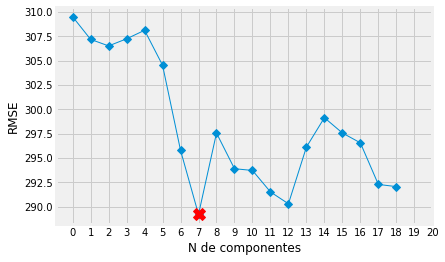

In [37]:
n = len(x_train)
k10 = KFold(n_splits = 10, shuffle=False, random_state = 1)
rmsepls = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = -1 * cross_val_score(pls, scale(x_train), y_train, cv = k10, scoring = 'neg_mean_squared_error').mean()
    rmsepls.append(np.sqrt(score))
    

min_rmse = np.array(rmsepls).argmin()

plt.plot(rmsepls, '-D', lw = 1)
plt.plot(rmsepls, markevery=[min_rmse], marker = 'X', lw = 0, color = 'red', markersize = 12)
plt.xlabel('N de componentes')
plt.ylabel('RMSE')
plt.xticks(np.linspace(0, 20, 21));

In [38]:
pls = PLSRegression(n_components=6)
pls.fit(scale(x_train), y_train)

mean_squared_error(y_test, pls.predict(scale(x_test)))

328553.7184260354

# Exercícios Conceituais

#### 1

+ a) Nos três, pois todos terão todos os preditores em algum momento

+ b) Best Subset

+ c)
    + V
    + V
    + F
    + F
    + F
    
#### 2
+ a) 
    + F
    + F
    + V
    + F
+ b)
    + F
    + F
    + V
    + F
+ c) 
    + F
    + T
    + F
    + F

#### 3
+ a) IV
+ b) II
+ c) III
+ d) IV
+ e) V

#### 4 
+ a)  III, pois quando o $\lambda$ aumenta, a flexibilidade diminui e aumenta-se o viés (para que seja diminuida a variância)
+ b) II, o aumento do $\lambda$  diminui a variância e aumenta o viés, mas depois de um lambda alto, o erro compensado de um não é suficiente
+ c) IV
+ d) III, com maior lambda, menor a flexibilidade, ou seja, menor a variância, e maior o viés
+ e) O erro irredutível 

#### 5

?

#### 6 

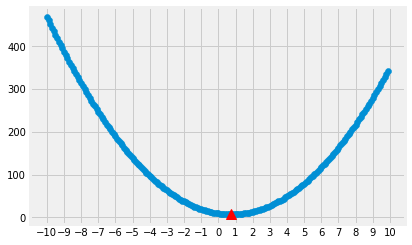

In [12]:
# a) p = 1, 6.12 é (y-Beta)**2 + lambdaBeta**2

y1 = np.random.randint(low = 1, high = 10)
lamb = np.random.randint(low  =1, high = 10)
beta = np.arange(-10, 10, .1)
y = (y1 - beta)**2  +  lamb*beta**2
min_beta  = y1/(1+lamb)
y_min = (y1 - min_beta)**2 + lamb*min_beta**2
plt.scatter(beta, y , antialiased = True)
plt.plot(min_beta,  y_min, '^', c  = 'red', markersize = 10)
plt.xticks(np.linspace(-10, 10, 21));

In [17]:
min_beta

4.0

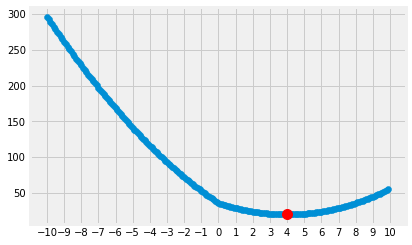

In [18]:
# b) p = 1, 6.12 é (y-B)**2 + lamb|B|

y1 = 6
lamb = 4

beta = np.arange(-10, 10, .1)
y = (y1-beta)**2 + lamb*abs(beta)
min_beta = y1 -  (lamb/2)
y_min  = (y1 - min_beta)**2 + lamb*abs(min_beta)

plt.scatter(beta, y)
plt.plot(min_beta, y_min, 'o', c  = "red", markersize = 10)
plt.xticks(np.linspace(-10, 10, 21));

# Aplicados

In [47]:
x = np.random.normal(size =100)
erro = np.random.normal(size = 100)
y = 10 -2 * x - 1 *  x ** 2 + 5 * x ** 3 + erro